<a href="https://colab.research.google.com/github/thirulic/MITS/blob/main/1_Getting_Started_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is pandas-python? Introduction and Installation

Pandas is python module that makes data science easy and effective

## Installation

pip install pandas

## Motivation

Weather dataset

Questions?

1. What was the maximum temparature in new york in the month of january?

2. On which days did it rains?

3. What was the average speed of wind during the month?


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/data/nyc_weather.csv")

In [ ]:
df.head()

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333


### 1. Using Pandas

In [ ]:
#get the maximum temparature
df['Temperature'].max()

50

In [ ]:
#to know which day it rains
df['EST'][df['Events'] == 'Rain']

8      1/9/2016
9     1/10/2016
15    1/16/2016
26    1/27/2016
Name: EST, dtype: object

In [ ]:
#3. average wind speed
df['WindSpeedMPH'].mean()

6.892857142857143

### 2. Without Using Pandas

In [ ]:
_parsed_rows = []

def parse_csv():
    import csv
    _file_path = "/content/drive/My Drive/data/nyc_weather.csv"

    global _parsed_rows
    with open(_file_path, "r") as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for row in reader:
            _parsed_rows.append({
                'date':  row[0],
                'temperature': row[1],
                'DewPoint': row[2],
                'Humidity': row[3],
                'Sea_Level_PressureIn': row[4],
                'VisibilityMiles': row[5],
                'WindSpeedMPH': row[6],
                'PrecipitationIn': row[7],
                'CloudCover': row[8],
                'Events': row[9],
                'WindDirDegrees': row[10]
            })

def get_max_temperature():
    max_temp = 0
    for row in _parsed_rows:
        if int(row['temperature']) > max_temp:
            max_temp = int(row['temperature'])
    return max_temp

def get_days_of_rain(event):
    days = []
    for row in _parsed_rows:
        if row['Events'] == event:
            days.append(row['date'])
    return days

def get_avg_wind_speed():
    total = 0
    count = 0
    for row in _parsed_rows:
        speed = 0 if row['WindSpeedMPH']=='' else int(row['WindSpeedMPH'])
        total += speed
        count += 1
    return float(total/count)

if __name__ == '__main__':
    parse_csv()

    print("Max Temperature is : " + str(get_max_temperature()))
    print("Days of rain : " + str(get_days_of_rain('Rain')))
    print("Average wind speed is : " + str(get_avg_wind_speed()))

Max Temperature is : 50
Days of rain : ['1/9/2016', '1/10/2016', '1/16/2016', '1/27/2016']
Average wind speed is : 6.225806451612903


# Pandas deals with the following three data structures −

1. Series
2. DataFrame
3. Panel

These data structures are built on top of Numpy array, which means they are fast.


## Dimension & Description

The best way to think of these data structures is that the higher dimensional data structure is a container of its lower dimensional data structure.

For example,
* DataFrame is a container of Series,
* Panel is a container of DataFrame.

Data Structure|	Dimensions|	Description
:-----------|:------------- |:-------------
Series |	1	| 1D labeled homogeneous array, sizeimmutable.
Data Frames	| 2	| General 2D labeled, size-mutable tabular structure with potentially heterogeneously typed columns.
Panel	| 3	| General 3D labeled, size-mutable array.


* Building and handling two or more dimensional arrays is a tedious task, burden is placed on the user to consider the orientation of the data set when writing functions.

* But using Pandas data structures, the mental effort of the user is reduced.

* **For example**, with tabular data (DataFrame) it is more semantically helpful to think of the index (the rows) and the columns rather than axis 0 and axis 1.


## Mutability
* All Pandas data structures are value mutable (can be changed) and except Series all are size mutable. Series is size immutable.

* **Note** − DataFrame is widely used and one of the most important data structures. Panel is used much less.

### Series
Series is a one-dimensional array like structure with homogeneous data.

For example, the following series is a collection of integers 10, 23, 56, …


10 |	23 |	56 | 	17| 	52 |	61 |	73 |	90 |	26 | 	72
:---|:--- |:---|:--- |:---|:--- |:---|:--- |:---|:---

**Key Points**
* Homogeneous data
* Size Immutable
* Values of Data Mutable


### DataFrame
DataFrame is a two-dimensional array with heterogeneous data. For example,

Name | 	Age	| Gender |	Rating
:---|:--- |:---|:---
Steve	| 32 | 	Male	| 3.45
Lia	| 28 |	Female |	4.6
Vin	| 45 |	Male	| 3.9
Katie	| 38	| Female |	2.78

* The table represents the data of a sales team of an organization with their overall performance rating. The data is represented in rows and columns.

* Each column represents an attribute and each row represents a person.

**Data Type of Columns**
The data types of the four columns are as follows −

Column |	Type
:---|:---
Name	| String
Age	| Integer
Gender |	String
Rating |	Float

**Key Points**

* Heterogeneous data
* Size Mutable
* Data Mutable

### Panel

Panel is a three-dimensional data structure with heterogeneous data.

It is hard to represent the panel in graphical representation.

But a panel can be illustrated as a container of DataFrame.

**Key Points**
* Heterogeneous data
* Size Mutable
* Data Mutable

# Series
Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.).

The axis labels are collectively called index.

## pandas.Series
A pandas Series can be created using the following constructor −

pandas.Series( data, index, dtype, copy)


The parameters of the constructor are as follows −

Sr.No	| Parameter & Description
:------- | :-------
1	| **data**
  | data takes various forms like ndarray, list, constants
2	| **index**
  | Index values must be unique and hashable, same length as data. Default np.arrange(n) if no index is passed.
3	| **dtype**
 | dtype is for data type. If None, data type will be inferred
4	| **copy**
  | Copy data. Default False

**A series can be created using various inputs like −**

* Array
* Dict
* Scalar value or constant



### Create a Series from ndarray
If data is an ndarray, then index passed must be of the same length.

If no index is passed, then by default index will be range(n) where n is array length, i.e., [0,1,2,3…. range(len(array))-1].

In [ ]:
#import the pandas library and aliasing as pd
import pandas as pd
import numpy as np
data = np.array(['a','b','c','d'])
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
dtype: object


We did not pass any index, so by default, it assigned the indexes ranging from 0 to **len(data)-1**, i.e., 0 to 3.

In [ ]:
import pandas as pd
import numpy as np
data = np.array(['a','b','c','d'])
s = pd.Series(data,index=[100,101,102,103])
print (s)

100    a
101    b
102    c
103    d
dtype: object


We passed the index values here. Now we can see the customized indexed values in the output.

### Create a Series from dict
A dict can be passed as input and if no index is specified, then the dictionary keys are taken in a sorted order to construct index.

If index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [ ]:
import pandas as pd
import numpy as np
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data)
print (s)

a    0.0
b    1.0
c    2.0
dtype: float64


**Observe** − Dictionary keys are used to **construct index.**

In [ ]:
import pandas as pd
import numpy as np
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data,index=['b','c','d','a'])
print (s)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


**Observe** − Index order is persisted and the missing element is filled with NaN (Not a Number).

### Create a Series from Scalar
If data is a scalar value, an index must be provided.

The value will be repeated to match the length of index



In [ ]:
import pandas as pd
import numpy as np
s = pd.Series(5, index=[0, 1, 2, 3])
print (s)

0    5
1    5
2    5
3    5
dtype: int64


### Accessing Data from Series with Position
Data in the series can be accessed similar to that in an ndarray.

**Example 1**

Retrieve the first element.

As we already know, the counting starts from zero for the array, which means the first element is stored at zeroth position and so on.

In [ ]:
import pandas as pd
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])

#retrieve the first element
print (s[0])

1


**Example 2**

Retrieve the first three elements in the Series.

If a : is inserted in front of it, all items from that index onwards will be extracted.

If two parameters (with : between them) is used, items between the two indexes (not including the stop index)

In [ ]:
import pandas as pd
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])

#retrieve the first three element
print (s[:3])

a    1
b    2
c    3
dtype: int64


### Retrieve Data Using Label (Index)
A Series is like a fixed-size dict in that you can get and set values by index label.

**Example 1**

Retrieve a single element using index label value.

In [ ]:
import pandas as pd
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])

#retrieve a single element
print (s['a'])

1


**Example 2**

Retrieve multiple elements using a list of index label values.

In [ ]:
import pandas as pd
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])

#retrieve multiple elements
print (s[['a','c','d']])

a    1
c    3
d    4
dtype: int64


# DataFrame

A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

### Features of DataFrame
* Potentially columns are of different types
* Size – Mutable
* Labeled axes (rows and columns)
* Can Perform Arithmetic operations on rows and columns

### Structure
Let us assume that we are creating a data frame with student’s data.

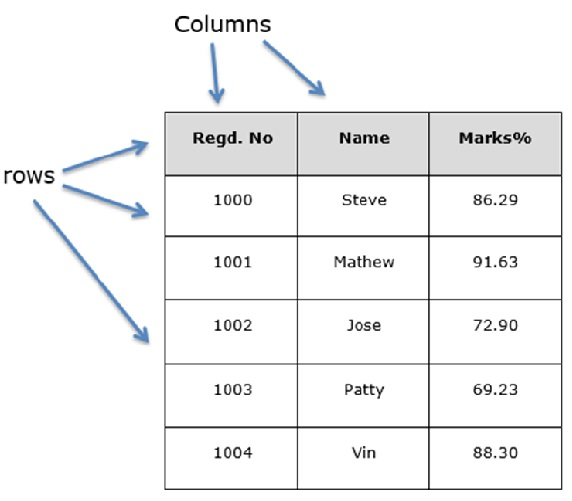

You can think of it as an SQL table or a spreadsheet data representation.

### pandas.DataFrame
A pandas DataFrame can be created using the following constructor −

**pandas.DataFrame( data, index, columns, dtype, copy)**

The parameters of the constructor are as follows −

Sr.No	| Parameter & Description
:-------- |:---------------
1	| data
| data takes various forms like ndarray, series, map, lists, dict, constants and also another DataFrame.
2	| index
| For the row labels, the Index to be used for the resulting frame is Optional Default np.arange(n) if no index is passed.
 3	| columns
| For column labels, the optional default syntax is - np.arange(n). This is only true if no index is passed.
4	| dtype
| Data type of each column.
5 | copy
| This command (or whatever it is) is used for copying of data, if the default is False.

### Create DataFrame
A pandas DataFrame can be created using various inputs like −

* Lists
* dict
* Series
* Numpy ndarrays
* Another DataFrame

In the subsequent sections of this chapter, we will see how to create a DataFrame using these inputs.

### Create an Empty DataFrame
A basic DataFrame, which can be created is an Empty Dataframe.

In [ ]:
import pandas as pd
df = pd.DataFrame()
print (df)

Empty DataFrame
Columns: []
Index: []


### Create a DataFrame from Lists
The DataFrame can be created using a single list or a list of lists.

In [ ]:
import pandas as pd
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print (df)

   0
0  1
1  2
2  3
3  4
4  5


In [ ]:
import pandas as pd
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print (df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [ ]:
import pandas as pd
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print (df)

ValueError: could not convert string to float: 'Alex'

**Note −** Observe, the dtype parameter changes the type of Age column to floating point.

### Create a DataFrame from Dict of ndarrays / Lists
All the ndarrays must be of same length. If index is passed, then the length of the index should equal to the length of the arrays.

If no index is passed, then by default, index will be range(n), where **n** is the array length.

In [ ]:
import pandas as pd
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print (df)

**Note** − Observe the values 0,1,2,3. They are the default index assigned to each using the function range(n).

Let us now create an indexed DataFrame using arrays


In [ ]:
import pandas as pd
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print (df)

**Note** − Observe, the index parameter assigns an index to each row.

### Create a DataFrame from List of Dicts
List of Dictionaries can be passed as input data to create a DataFrame. The dictionary keys are by default taken as column names.

The following example shows how to create a DataFrame by passing a list of dictionaries

In [ ]:
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
print (df)

**Note** − Observe, NaN (Not a Number) is appended in missing areas.


The following example shows how to create a DataFrame by passing a list of dictionaries and the row indices.

In [ ]:
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data, index=['first', 'second'])
print (df)

The following example shows how to create a DataFrame with a list of dictionaries, row indices, and column indices.

In [ ]:
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]

#With two column indices, values same as dictionary keys
df1 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b'])

#With two column indices with one index with other name
df2 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b1'])
print (df1)
print (df2)

**Note −** Observe, df2 DataFrame is created with a column index other than the dictionary key; thus, appended the NaN’s in place. Whereas, df1 is created with column indices same as dictionary keys, so NaN’s appended.

## Create a DataFrame from Dict of Series
Dictionary of Series can be passed to form a DataFrame. The resultant index is the union of all the series indexes passed.

In [ ]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df)

**Note −** Observe, for the series one, there is no label ‘d’ passed, but in the result, for the d label, NaN is appended with NaN.

Let us now understand column selection, addition, and deletion through examples.

### Column Selection
We will understand this by selecting a column from the DataFrame.

In [ ]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df ['one'])

### Column Addition
We will understand this by adding a new column to an existing data frame.

In [ ]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

# Adding a new column to an existing DataFrame object with column label by passing new series

print ("Adding a new column by passing as Series:")
df['three']=pd.Series([10,20,30],index=['a','b','c'])
print (df)

print ("Adding a new column using the existing columns in DataFrame:")
df['four']=df['one']+df['three']

print (df)

### Column Deletion
Columns can be deleted or popped; let us take an example to understand how.

In [ ]:
# Using the previous DataFrame, we will delete a column
# using del function
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']),
   'three' : pd.Series([10,20,30], index=['a','b','c'])}

df = pd.DataFrame(d)
print ("Our dataframe is:")
print (df)

# using del function
print ("Deleting the first column using DEL function:")
del (df['one'])
print (df)

# using pop function
print ("Deleting another column using POP function:")
df.pop('two')
print (df)

### Row Selection, Addition, and Deletion
We will now understand row selection, addition and deletion through examples. Let us begin with the concept of selection.

**Selection by Label**

Rows can be selected by passing row label to a loc function.

In [ ]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df.loc['b'])

The result is a series with labels as column names of the DataFrame. And, the Name of the series is the label with which it is retrieved.

**Selection by integer location**

Rows can be selected by passing integer location to an iloc function.

In [ ]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df.iloc[2])

**Slice Rows**

Multiple rows can be selected using ‘ : ’ operator.

In [ ]:
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print (df[2:4])

**Addition of Rows**

Add new rows to a DataFrame using the append function. This function will append the rows at the end.

In [ ]:
import pandas as pd

df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)
print (df)

**Deletion of Rows**

Use index label to delete or drop rows from a DataFrame. If label is duplicated, then multiple rows will be dropped.

If you observe, in the above example, the labels are duplicate. Let us drop a label and will see how many rows will get dropped.

In [ ]:
import pandas as pd

df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)

# Drop rows with label 0
df = df.drop(0)

print (df)

In the above example, two rows were dropped because those two contain the same label 0.

### 1. Installation

pip install pandas

pip install jupyterlab

### 2. Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/data/survey_results_schema_2019.csv")

### 3. Top 5 rows

In [ ]:
data.head()

### 4. Last 5 rows

In [ ]:
data.tail()

### 5. Dataframe shape

In [ ]:
data.shape

### 6. Information about the data

In [ ]:
data.info()

### 7. Description of numerical features

In [ ]:
data.describe()

### 8. Printing the column names

In [ ]:
data.columns

In [ ]:
schema = pd.read_csv('/content/drive/My Drive/data/survey_results_schema_2019.csv')

In [ ]:
schema

In [ ]:
pd.set_option('display.max_rows',85)

## Basic Pandas Concept Exercises

In [ ]:
sales = [100,130,119,92,35]
customer_account = ['B100','J101','X102','P103','R104']
city = ['BOS','LA','NYC','SF','CHI']

#### Create a DataFrame with the data above

#### What is the name of the first column?

#### Sort the DataFrame by city in descending order (check the documentation for sort)

#### Which customer is in the last row of the DataFrame?

#### Reorder the columns with customer in the first column